In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [32]:
df=pd.read_csv('Housing.csv')
print(df.shape)
print(df["furnishingstatus"].unique())

(545, 13)
['furnished' 'semi-furnished' 'unfurnished']


C:\Users\Admin\AppData\Local\Temp\ipykernel_2600\611465507.py:6: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Admin\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


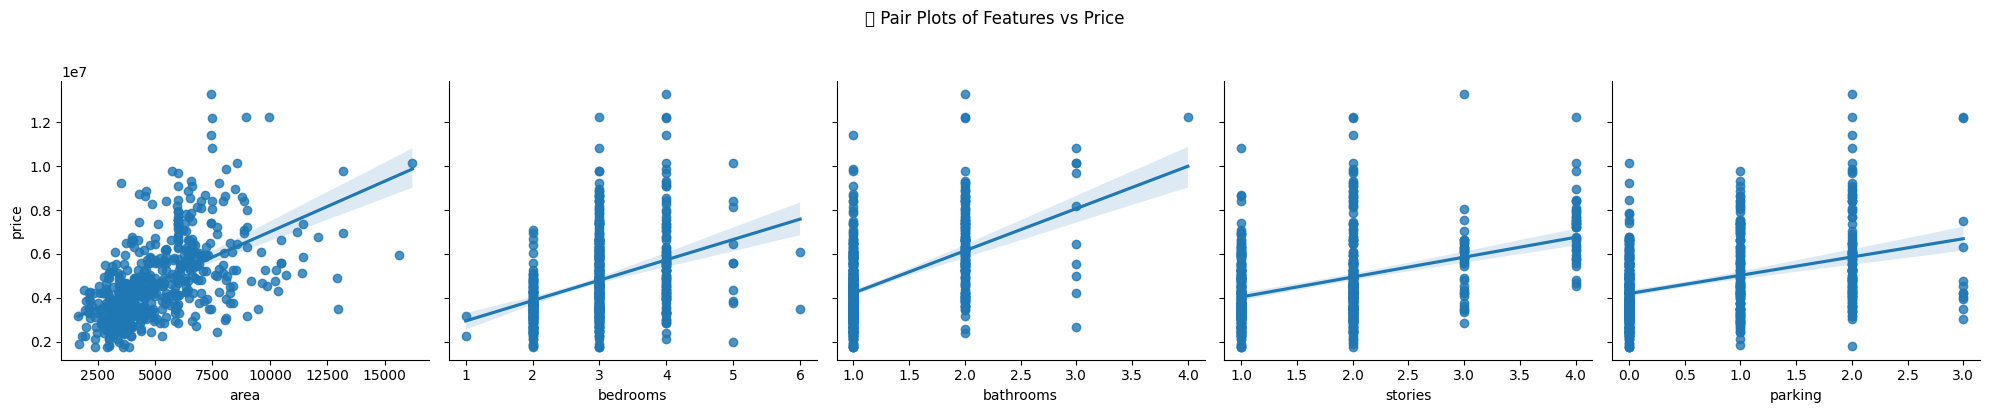

In [33]:
df_numeric = df.select_dtypes(include=np.number)

# Create pair plot (features vs price)
sns.pairplot(df_numeric, y_vars=["price"], x_vars=[col for col in df_numeric.columns if col != "price"], kind="reg", height=4)
plt.suptitle("📉 Pair Plots of Features vs Price", y=1.02)
plt.tight_layout()
plt.show()

In [34]:
# Lbel Encoding cat-> numerical
binarry_map = {"yes": 1, "no": 0}
df["mainroad"] = df["mainroad"].map(binarry_map)
df["guestroom"] = df["guestroom"].map(binarry_map)
df["basement"] = df["basement"].map(binarry_map)
df["hotwaterheating"] = df["hotwaterheating"].map(binarry_map)
df["airconditioning"] = df["airconditioning"].map(binarry_map)
df["prefarea"] = df["prefarea"].map(binarry_map)

df["furnishingstatus"] = df["furnishingstatus"].map({"furnished": 1, "semi-furnished": 0.5, "unfurnished": 0})

df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1.0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1.0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0.5
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1.0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1.0


In [35]:
print(df.columns.tolist())

['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']


In [36]:
X = df.drop(columns=["price"]).values
y = df["price"].values

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [38]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
def online_learning(x, y, w):
    learning_rate=0.00000001
    for i in range(len(x)):
        y_pred = sum([w[j] * x[i][j] for j in range(len(x[i]))])
        y_pred+= w[-1] # bias term
        error = y[i] - y_pred
        for j in range(len(w)):
            if(j==len(w)-1):
                w[j] -= -2*learning_rate * error #bias term differential tem
            else:
               w[j] -= -2*learning_rate * error * x[i][j]

In [40]:
def batch_learning(x, y, w, epochs=1000):
    learning_rate = 0.00001  
    n = len(x)
    for epoch in range(epochs):
        gradient = [0] * len(w)
        for i in range(n):
            y_pred = sum([w[j] * x[i][j] for j in range(len(x[i]))]) + w[-1]
            error = y[i] - y_pred
            for j in range(len(x[i])):
                gradient[j] -= 2 * error * x[i][j]
            gradient[-1] -= 2 * error  # bias gradient
       
        for j in range(len(w)):
            w[j] -= learning_rate * gradient[j]

In [41]:
def evaluate_model(X, y, w, name="Model"):
    predictions = [sum(w[j] * x[j] for j in range(len(x))) + w[-1] for x in X]
    avg_error = np.mean(np.abs(np.array(predictions) - y))
    print(f"[{name}] Average Absolute Error: {avg_error:.2f}")
    return avg_error

In [42]:
w_online = [0] * (X_train.shape[1] + 1)
w_batch = [0] * (X_train.shape[1] + 1)

In [43]:
online_learning(X_train, y_train, w_online)
batch_learning(X_train, y_train, w_batch)

In [44]:
err_online = evaluate_model(X_test, y_test, w_online, "Online GD")
err_batch = evaluate_model(X_test, y_test, w_batch, "Batch GD")

[Online GD] Average Absolute Error: 4812790.07
[Batch GD] Average Absolute Error: 918730.18
